# imports

In [141]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

import ColorDataUtils.mattplotlib as mplt
from ColorDataUtils.multidata_utils import MultiExperiment

class Model:
    def __init__(self):
        pass
from models import iter_core, cnn_core

device = torch.device("cuda:1")

datadir = '/home/dbutts/ColorV1/Data/'
dirname = '/home/dbutts/ColorV1/CLRworkspace/'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load data

In [ ]:
num_lags=16
expt_names = ['J220715','J220722','J220801','J220808']
array_types = ['UT', 'UT', 'UT', 'UT']
expts = MultiExperiment(expt_names)
data, drift_terms, mu0s = expts.load(datadir,
                                     num_lags=num_lags,
                                     et_metric_thresh=0.8,
                                     array_types=array_types,
                                     luminance_only=True,
                                     build_stim=False)

# computations per neuron

In [ ]:
# what relationship do neurons have to filters in projection layer
layer_num_inhs, layer_heights, layer_bounds, readout_weights = mplt.get_readout_weights(iter_core.ndn_model)

In [ ]:
from scipy.cluster import hierarchy
# cluster the proj_weights
# make a distance matrix between the neurons based on their weights
dists = np.zeros((proj_weights.T.shape[0], proj_weights.T.shape[0]))
for i in range(proj_weights.T.shape[0]):
    for j in range(proj_weights.T.shape[0]):
        dists[i,j] = np.sum(np.abs((proj_weights.T[i] - proj_weights.T[j])))

Z = hierarchy.linkage(dists, 'single')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)

In [ ]:
mplt.plot_readout_weights(iter_core.ndn_model)

In [ ]:
mplt.plot_exc_inh(iter_core.ndn_model)

# computations per channel

In [142]:
proj_weights = readout_weights[:layer_bounds[1]]
print(proj_weights.shape)

channel_map = []
expt_bounds = []
last_expt_bound = 0
for expt in range(4):
    expt_bounds.append(len(expts[expt].val_inds) + last_expt_bound)
    last_expt_bound = expt_bounds[-1]
    channel_map.append(data.file_info[expt]['channel_map'][expts[expt].val_inds])
channel_map = np.concatenate(channel_map)
print(channel_map.shape)

# get the number of neurons in each channel
channel_sizes = np.bincount(channel_map)
#print(len(channel_sizes), np.where(channel_sizes > 4))
print(np.unique(channel_map))

np.where([channel_map == 255])[1]

(45, 587)
(587,)
[160 161 163 164 165 166 167 168 169 170 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255]


array([100, 173, 585])

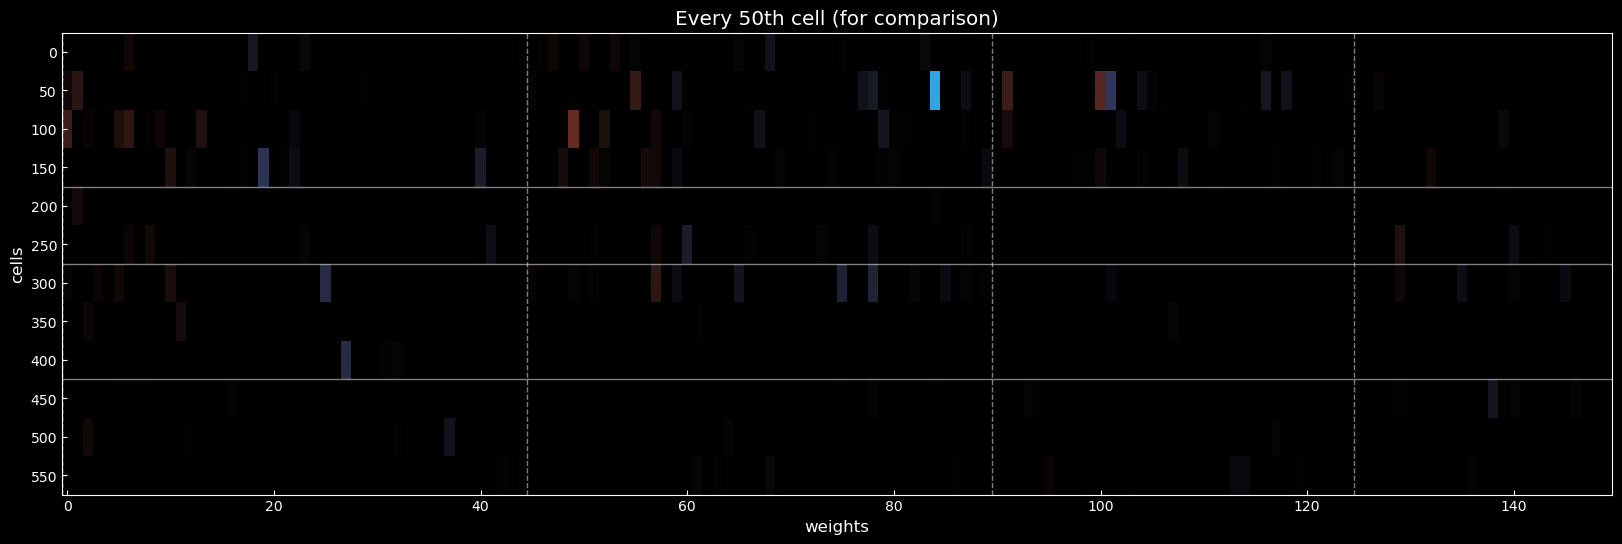

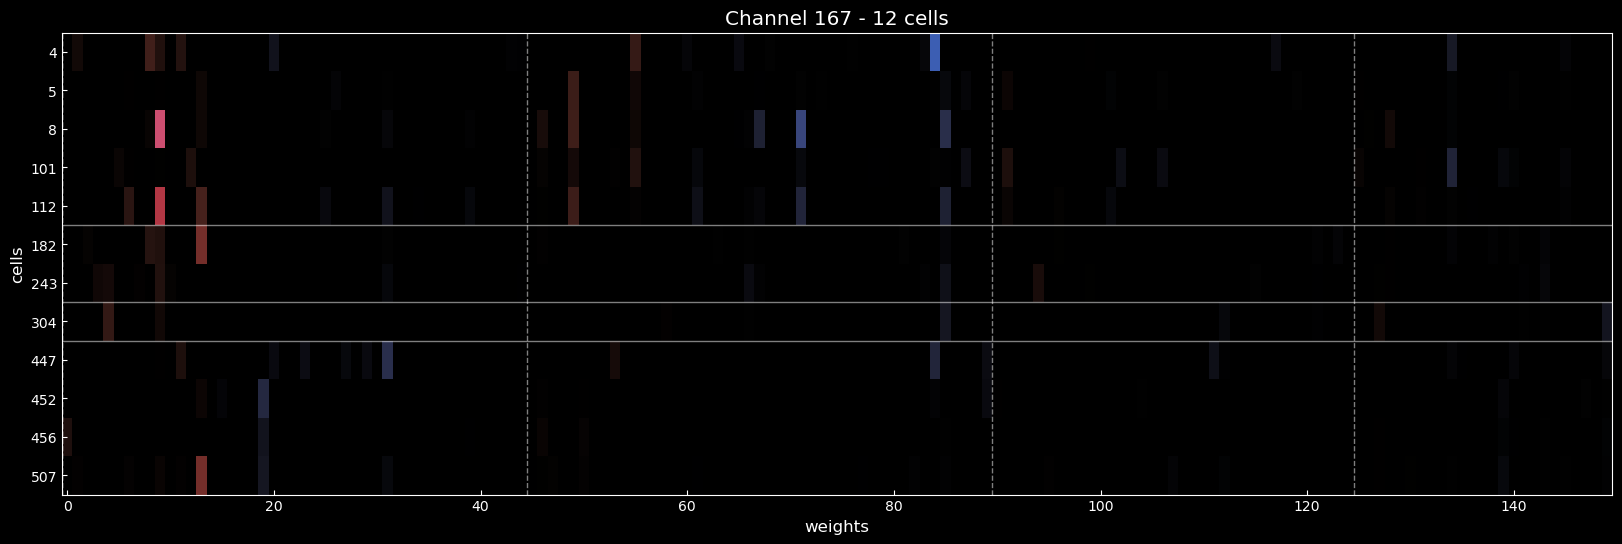

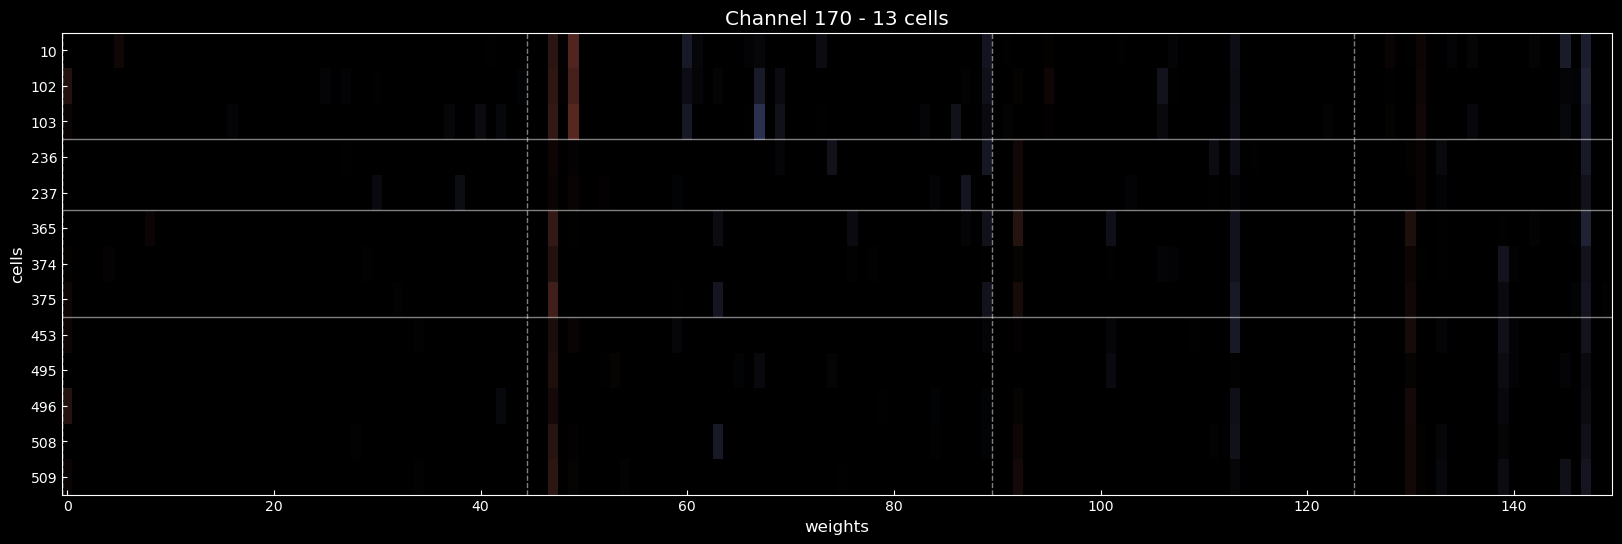

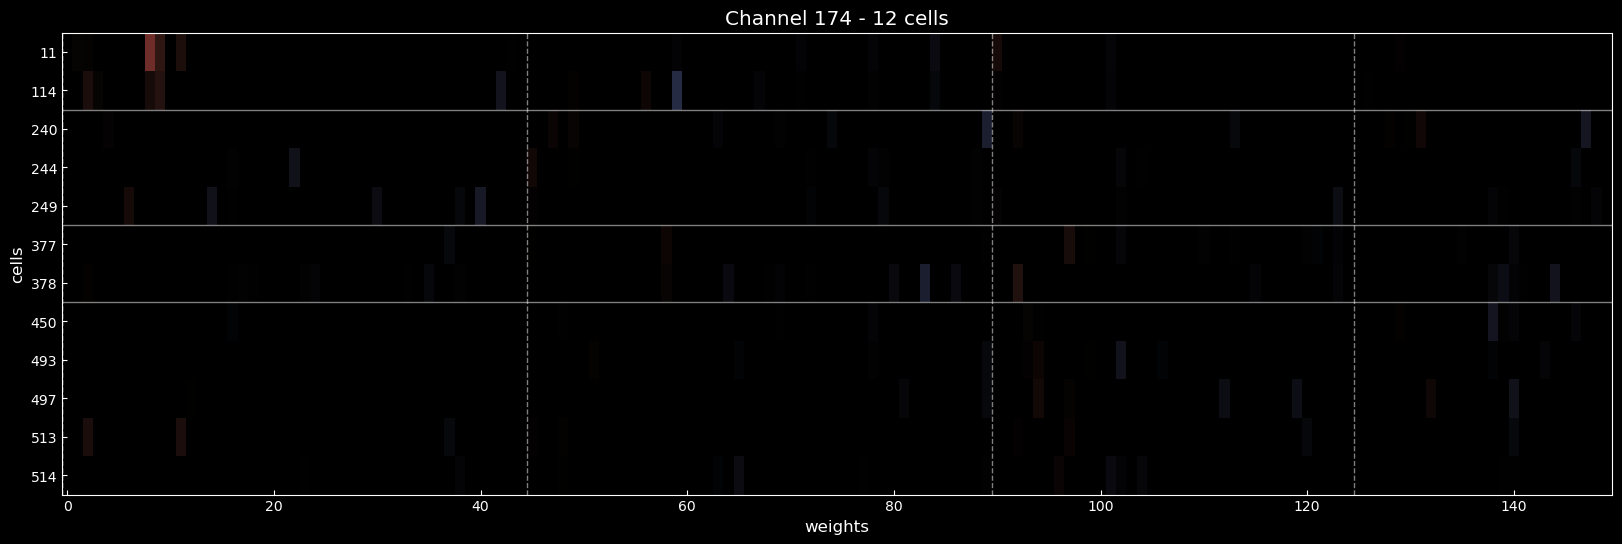

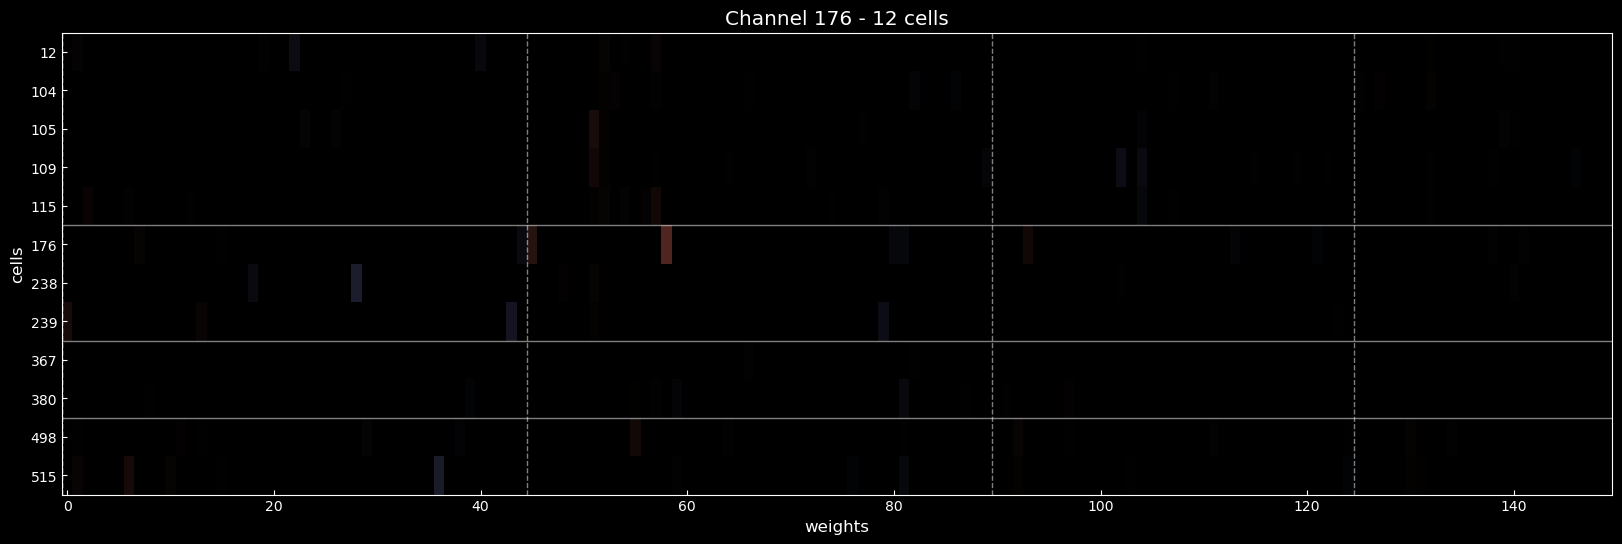

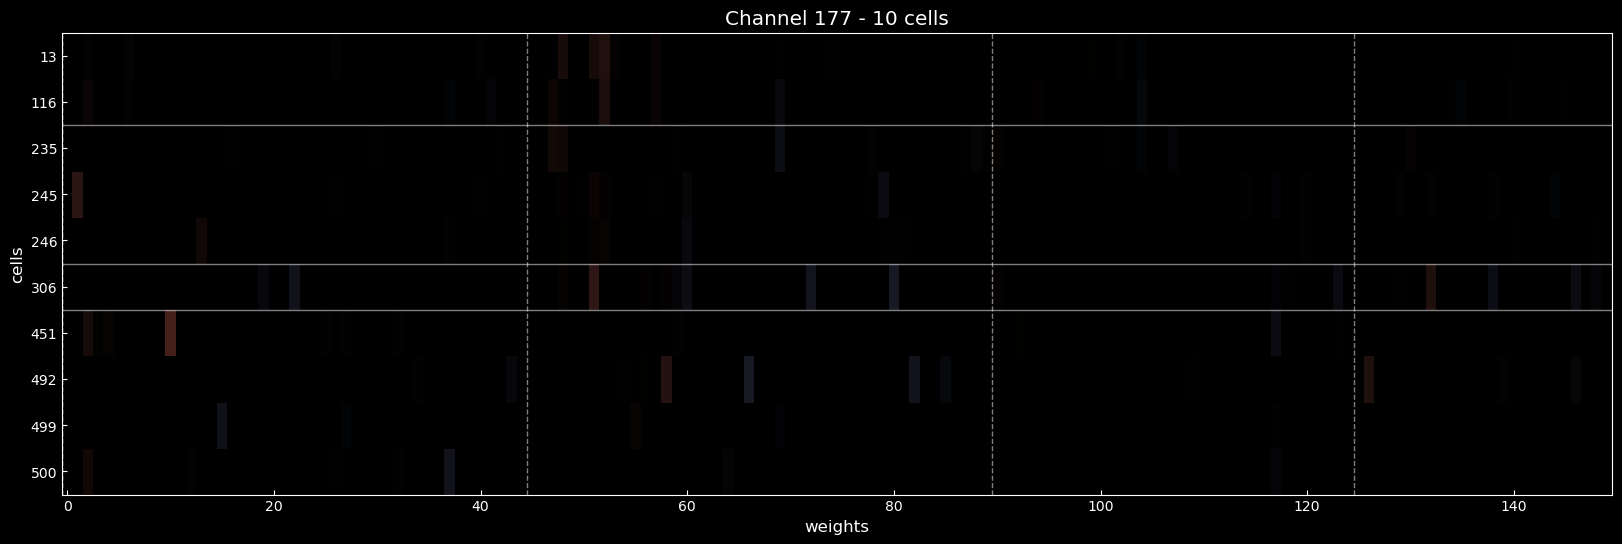

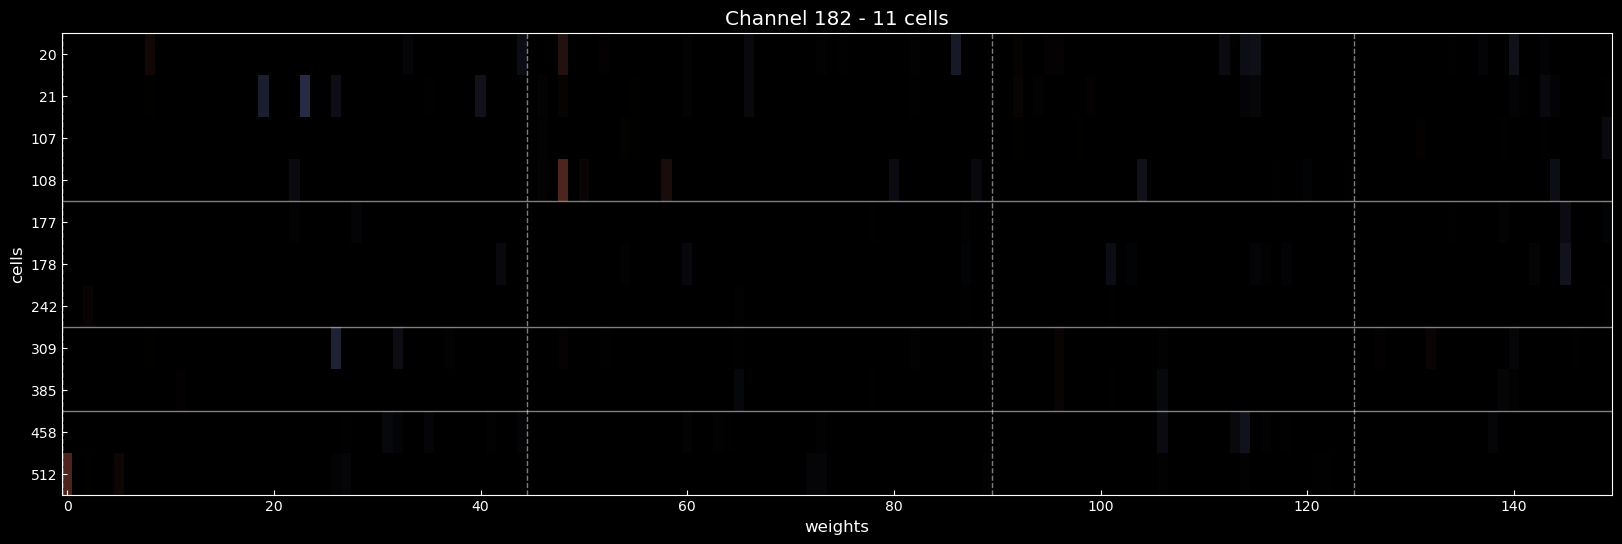

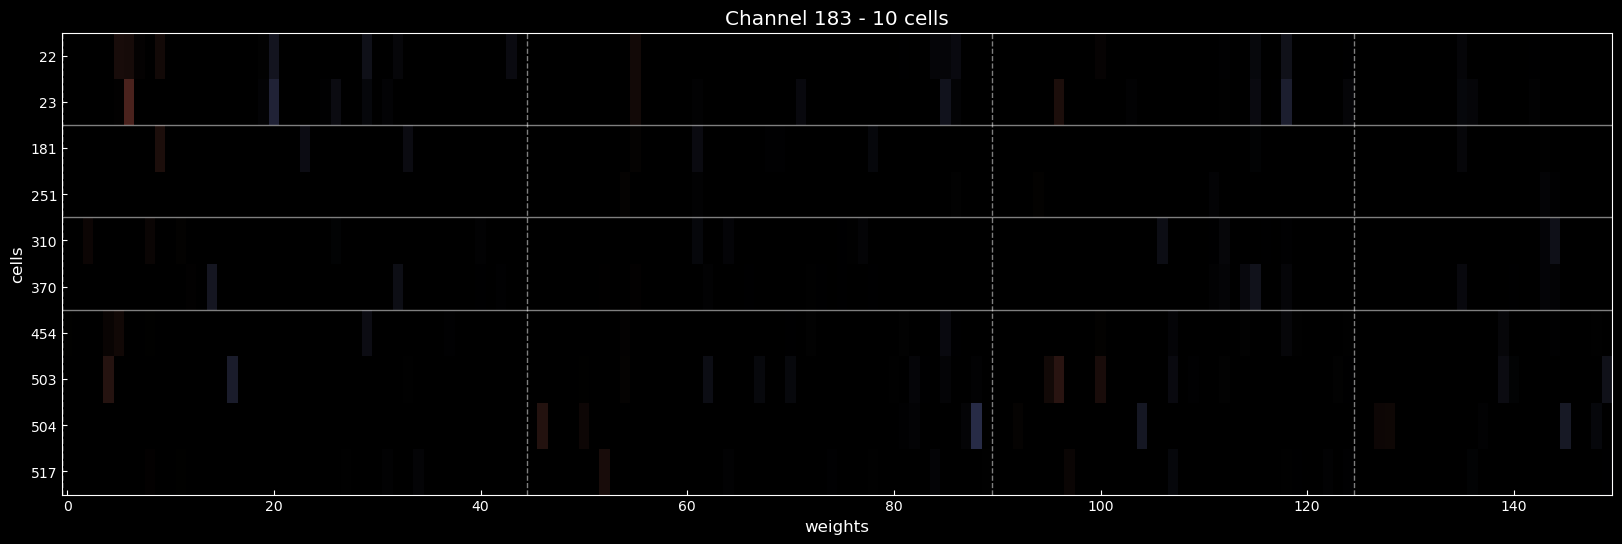

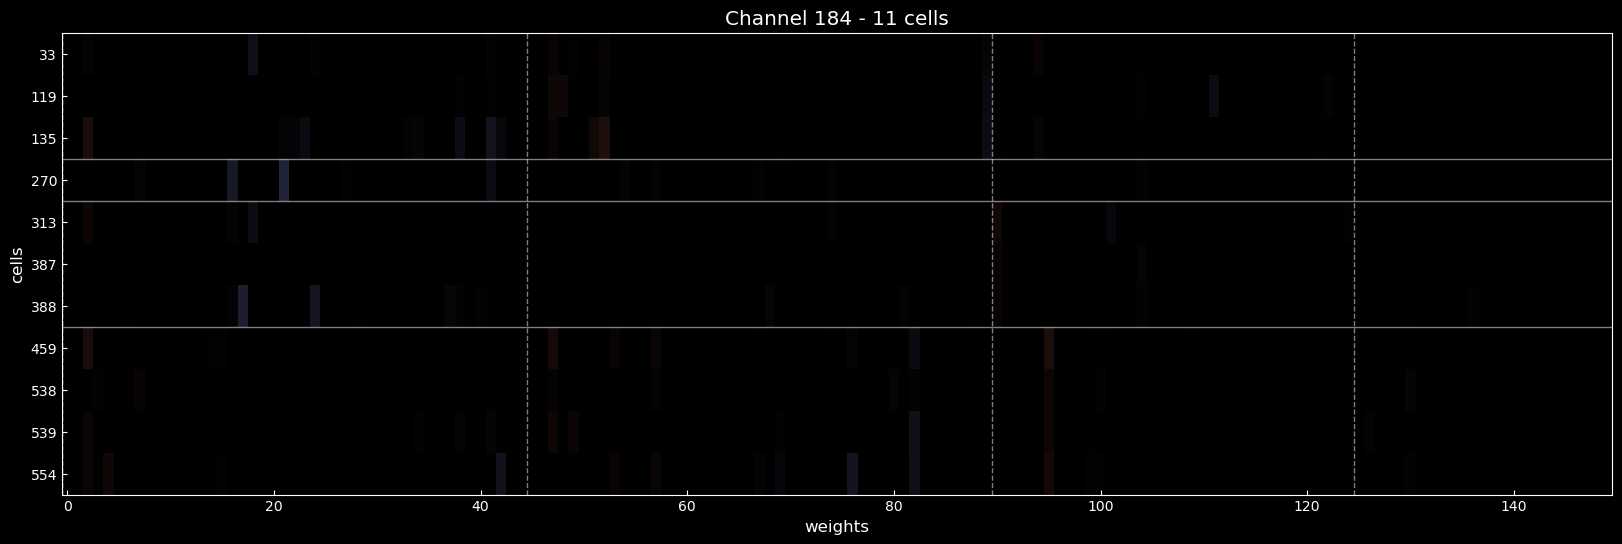

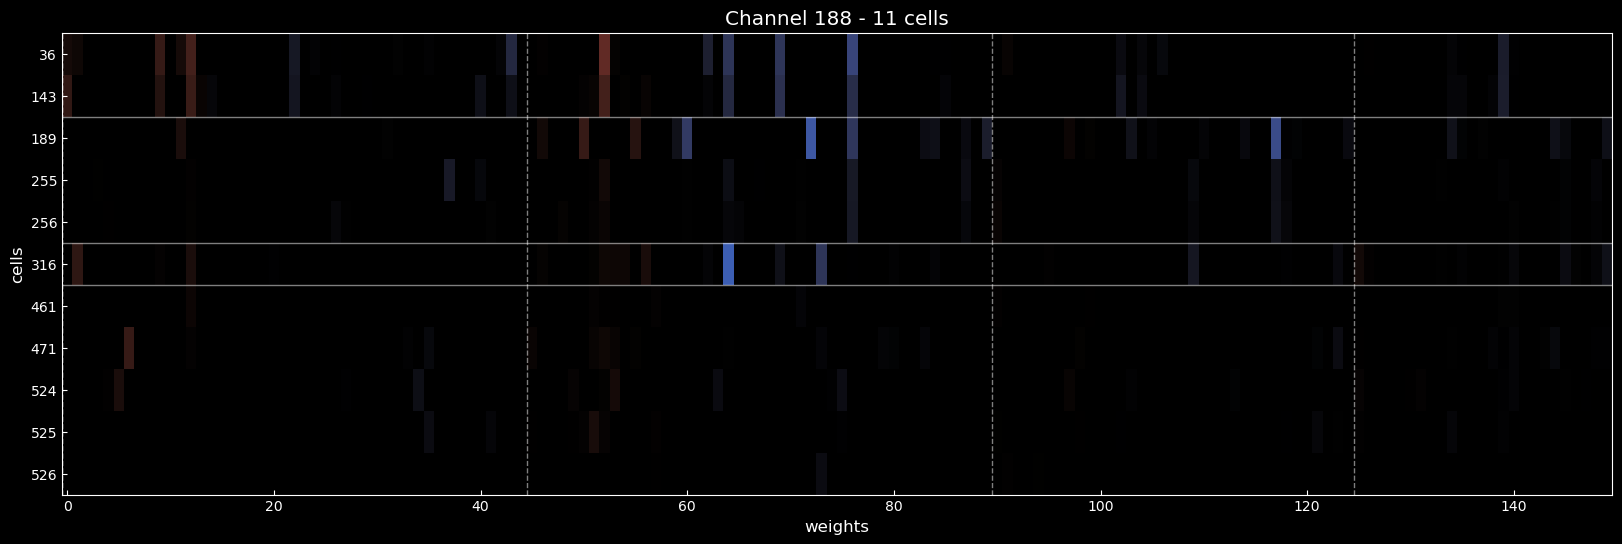

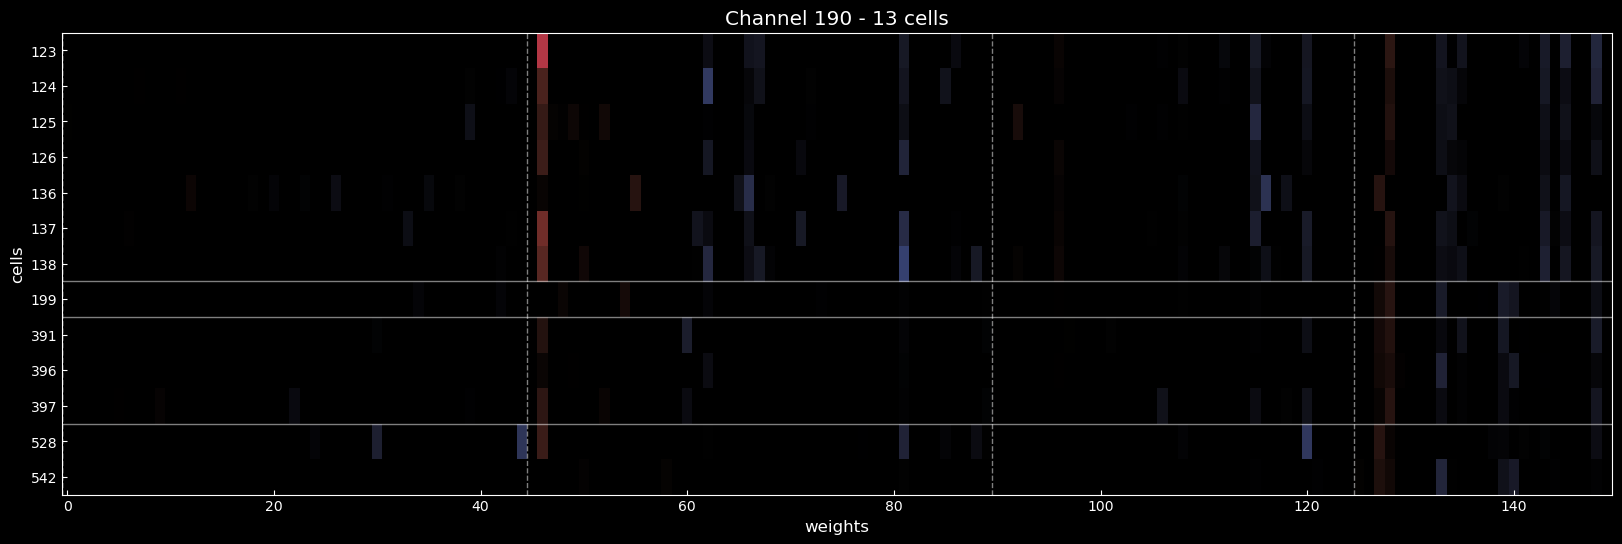

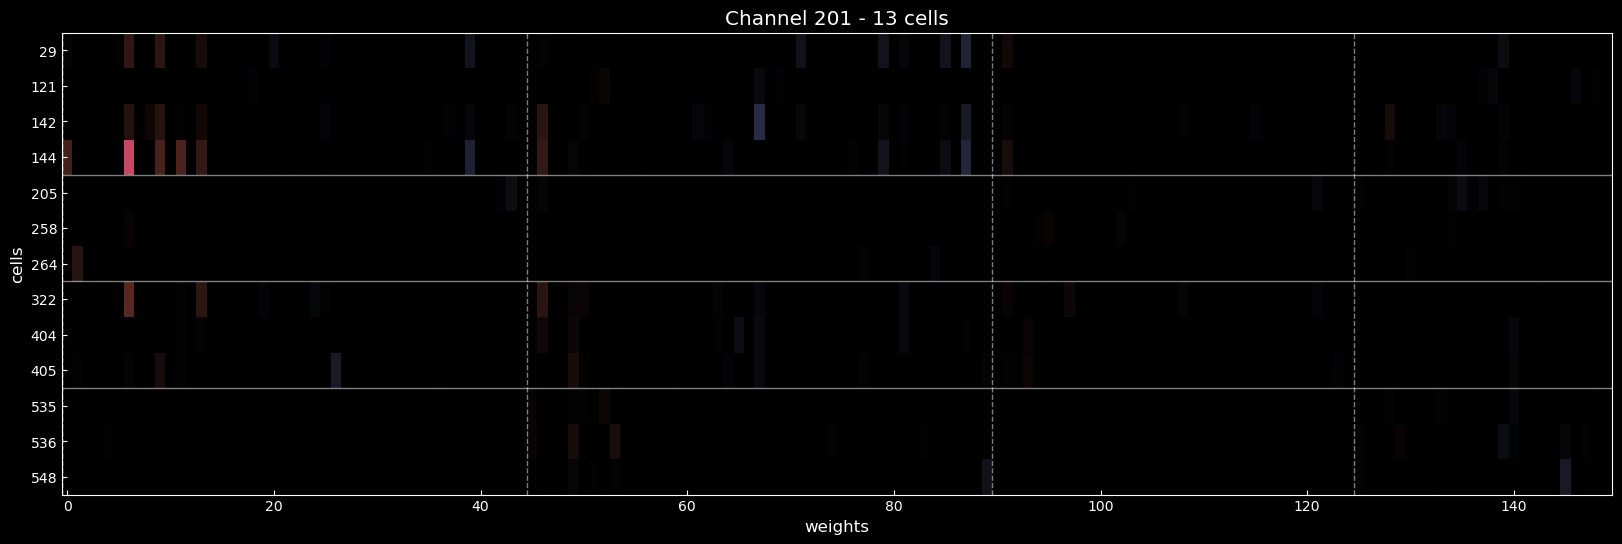

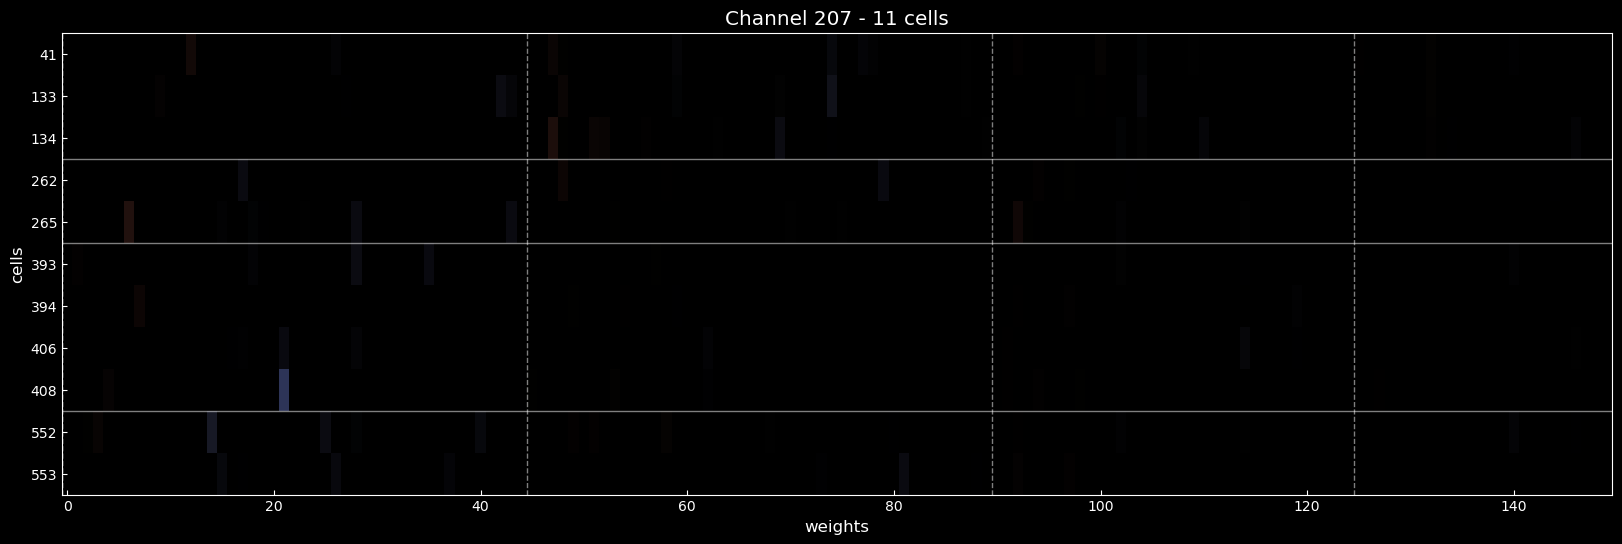

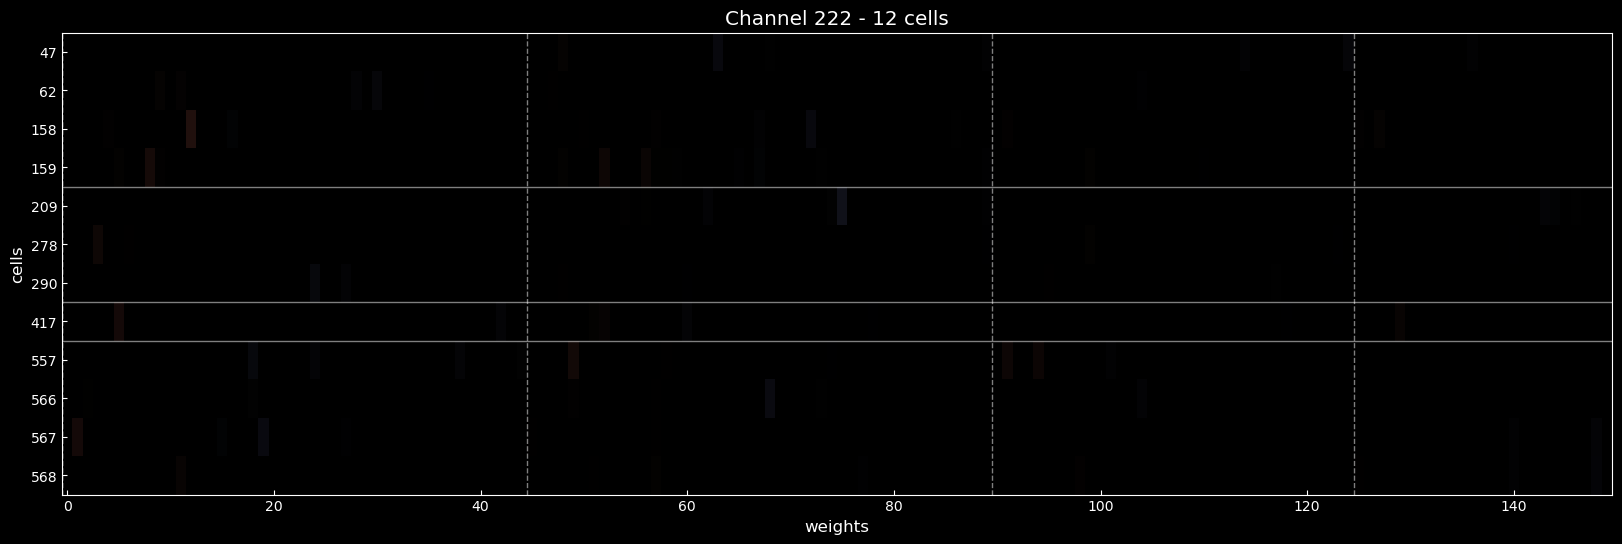

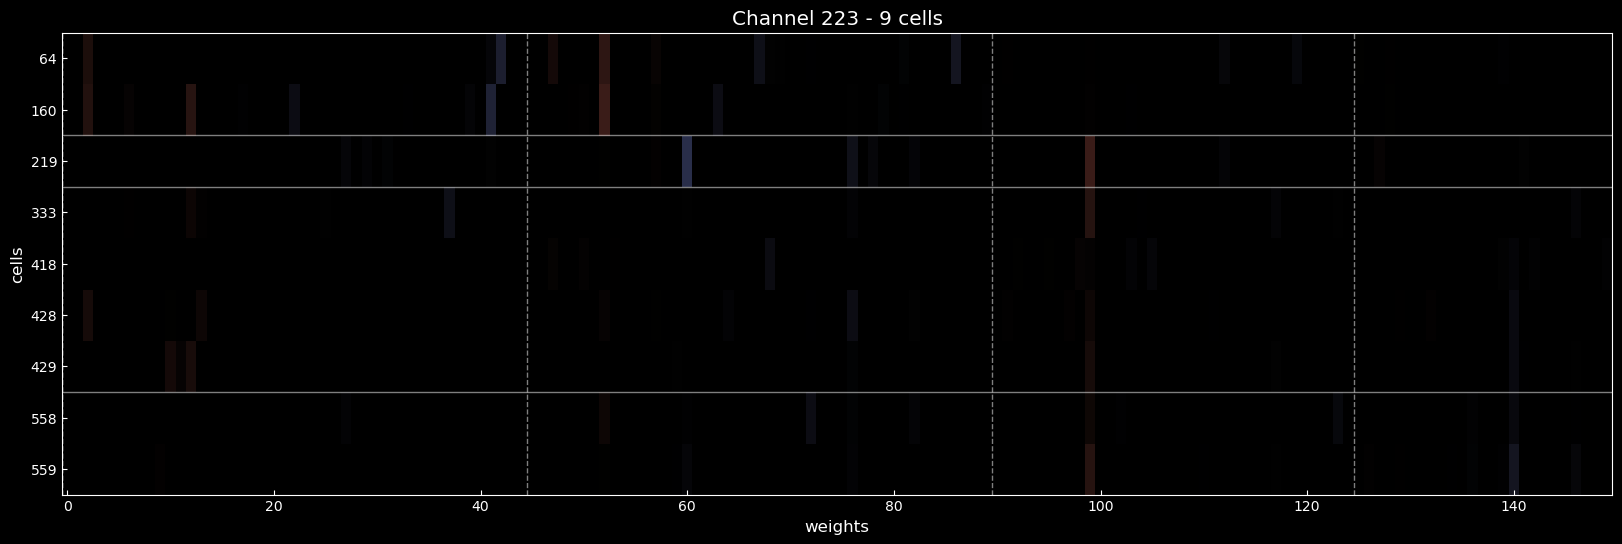

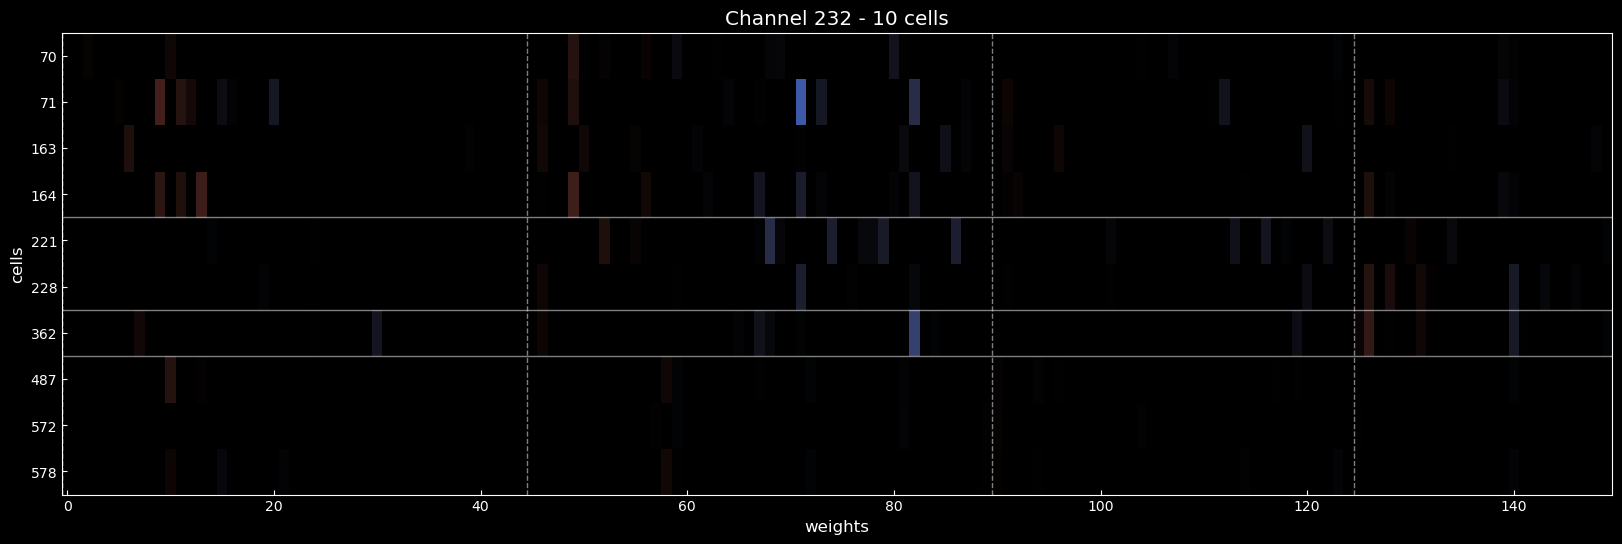

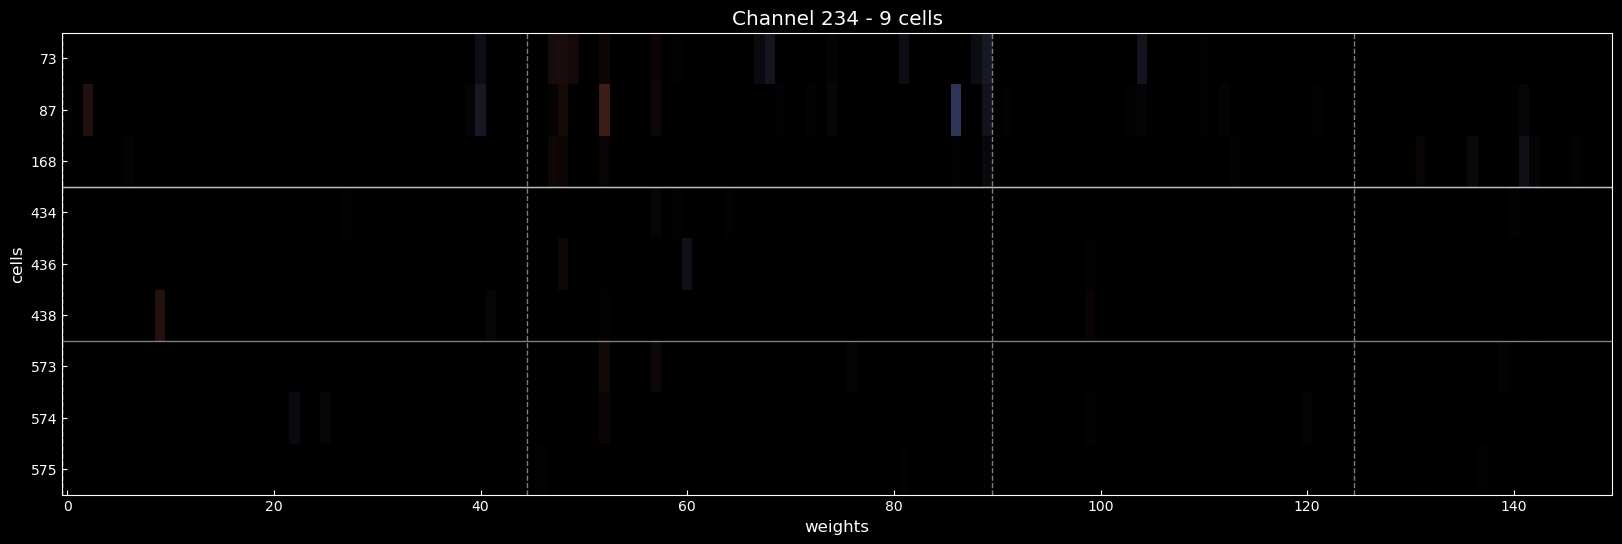

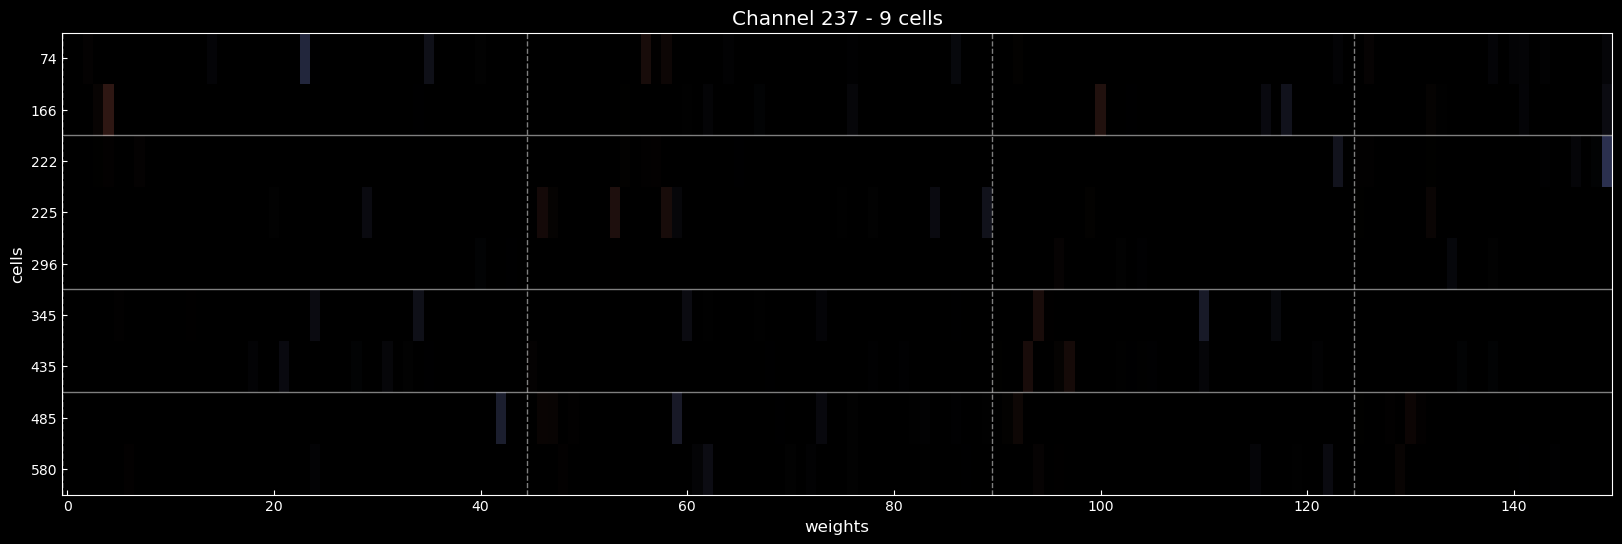

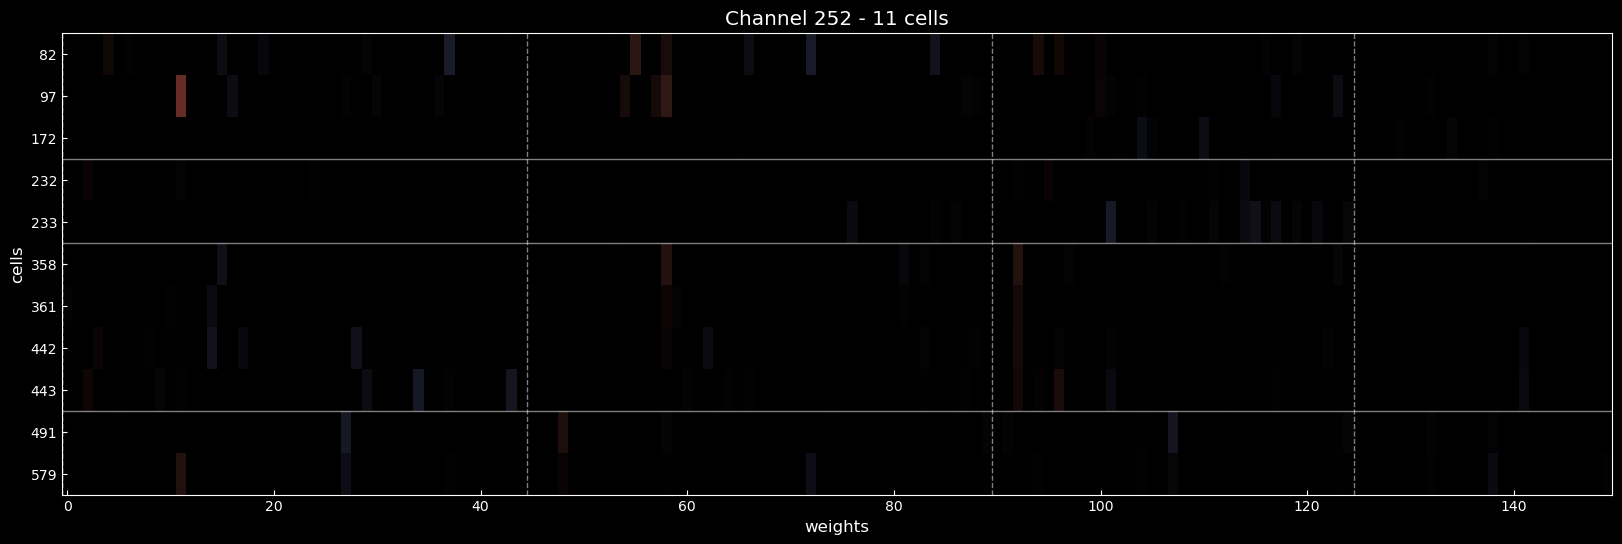

In [145]:
mplt.darkmode()

# get neurons by channel
mplt.plot_readout_weights(iter_core.ndn_model, 
                              cells=list(range(0, data.NC, 50)),
                              expt_bounds=expt_bounds,
                              title='Every 50th cell (for comparison)',
                              figsize=(20,6))

for channel in np.where(channel_sizes > 8)[0]:
    num_cells = len(channel_map[channel_map == channel])
    cells = np.where([channel_map == channel])[1]

    # plot the readout weights for this channel
    mplt.plot_readout_weights(iter_core.ndn_model, 
                              cells=cells, 
                              expt_bounds=expt_bounds,
                              title='Channel {} - {} cells'.format(channel, num_cells), 
                              figsize=(20,6))

    # plot exh/inh
    # mplt.plot_exc_inh(iter_core.ndn_model, 
    #                   readout_weights, 
    #                   cells=cells, 
    #                   title='Channel {} - {} cells'.format(channel, num_cells),
    #                   figsize=(10,2))

## channels --> proj